In [1]:
import os
import sys
from sparclur import Spotlight
from sparclur.parsers import *
import re

### Load the Hello World pdf

In [2]:
hello_world = os.path.join(sys.prefix, 'etc', 'sparclur', 'resources', 'hello_world_hand_edit.pdf')
#If the above does not load try the below. Otherwise any path to a PDF can be used here.
# hello_world = os.path.join(site.USER_BASE, 'etc', 'sparclur', 'resources', 'hello_world_hand_edit.pdf')

### Set the parsers to run with Spotlight

In [3]:
parsers = ['Poppler', 'MuPDF', 'PDFCPU', 'Ghostscript', 'XPDF', 'PDFMiner', 'QPDF']

### Instantiate Spotlight and generate the result

In [4]:
spotlight = Spotlight(num_workers=5, parsers=parsers)
spotlight_result = spotlight.run(hello_world)

mutool version 1.16.1
pdftocairo version 21.11.0
Copyright 2005-2021 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011 Glyph & Cog, LLC


GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
   **** Error:  An error occurred while reading an XREF table.
   **** The file has been damaged.  This may have been caused
   **** by a problem while converting or transferring the file.
   **** Ghostscript will attempt to recover the data.
   **** However, the output may be incorrect.
Processing pages 1 through 1.
Page 1
   **** Error: stream Length incorrect.
               Output may be incorrect.
Loading NimbusRoman-Regular font from /usr/local/Cellar/ghostscript/9.55.0/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 5086596 3570398 2511964 1142448 4 done.

   **** This file had errors that were repaired or ignored.
   **** Please notify the author of the software that produced this
   **** file that it does not conform to Adobe's published PDF
   **** specific

mutool version 1.16.1
pdftocairo version 21.11.0
Copyright 2005-2021 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011 Glyph & Cog, LLC
  0%|                                                                                                                                                                             | 0/28 [00:00<?, ?it/s]

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
Loading NimbusRoman-Regular font from /usr/local/Cellar/ghostscript/9.55.0/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 4446076 2950014 6452568 5112214 4 done.


  4%|█████▉                                                                                                                                                               | 1/28 [00:00<00:11,  2.34it/s]

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
   **** Error:  An error occurred while reading an XREF table.
   **** The file has been damaged.  This may have been caused
   **** by a problem while converting or transferring the file.
   **** Ghostscript will attempt to recover the data.
   **** However, the output may be incorrect.
Processing pages 1 through 1.
Page 1
   **** Error: stream Length incorrect.
               Output may be incorrect.
Loading NimbusRoman-Regular font from /usr/local/Cellar/ghostscript/9.55.0/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 4425876 2942629 6510500 5183647 4 done.
GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.

 14%|███████████████████████▌                                                                                                                                             | 4/28 [00:00<00:04,  5.47it/s]

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
   **** Error:  An error occurred while reading an XREF table.
   **** The file has been damaged.  This may have been caused
   **** by a problem while converting or transferring the file.
   **** Ghostscript will attempt to recover the data.
   **** However, the output may be incorrect.
Processing pages 1 through 1.
Page 1
   **** Error: stream Length incorrect.
       

 29%|███████████████████████████████████████████████▏                                                                                                                     | 8/28 [00:01<00:02,  7.68it/s]

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 45239.03it/s]


<hr>

### Display the report for the validity of the original file and all of the cleaned-up versions for each parser run through Spotlight

In [5]:
spotlight_result.validity_report()

,original,Ghostscript,MuPDF,Poppler
XPDF,Rejected,Valid,Valid,Valid
PDFCPU,Valid,Valid,Valid,Valid
Ghostscript,Valid,Valid,Valid,Valid
PDFMiner,Valid,Valid,Valid,Valid
QPDF,Valid with Warnings,Valid,Valid,Valid
MuPDF,Rejected,Valid,Valid,Valid
Poppler,Rejected,Valid,Rejected,Valid
Overall,Rejected,Valid,Rejected,Valid


<hr>

### Since Poppler rejects the cleaned-up version generated by MuPDF, the file's recovery is ambiguous. This can be seen in the call below.

In [6]:
print(spotlight_result.recoverable())

Recovery ambigous:
	MuPDF: Rejected


<hr>

### Let's see why Poppler rejected the file in the first place. All tools came back valid except font extraction.

In [7]:
poppler = Poppler(hello_world)
poppler.validity

{'Tracer': {'valid': True, 'status': 'Valid'},
 'Text Extractor': {'valid': True, 'status': 'Valid'},
 'Renderer': {'valid': True, 'status': 'Valid'},
 'Font Extractor': {'valid': False,
  'status': 'Rejected',
  'info': 'Errors returned'},
 'Image Data': {'valid': True, 'status': 'Valid'},
 'overall': {'valid': False, 'status': 'Rejected'}}

<hr>

### Here's the extracted font:

In [8]:
poppler.fonts

[{'name': 'Times-Roman',
  'type': 'Type 1',
  'encoding': 'Standard',
  'emb': False,
  'sub': False,
  'uni': False,
  'object ID': '[none] R'}]

<hr>

### Let's clean up the file using Poppler and see what happens to the font:

In [9]:
poppler_cleanup = poppler.reforge
cleaned_poppler = Poppler(poppler_cleanup)
cleaned_poppler.validity

pdftocairo version 21.11.0
Copyright 2005-2021 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011 Glyph & Cog, LLC


{'Tracer': {'valid': True, 'status': 'Valid'},
 'Text Extractor': {'valid': True, 'status': 'Valid'},
 'Renderer': {'valid': True, 'status': 'Valid'},
 'Font Extractor': {'valid': True, 'status': 'Valid'},
 'Image Data': {'valid': True, 'status': 'Valid'},
 'overall': {'valid': True, 'status': 'Valid'}}

In [10]:
cleaned_poppler.fonts

[{'name': 'QELDOZ+Times-Roman',
  'type': 'TrueType',
  'encoding': 'WinAnsi',
  'emb': True,
  'sub': True,
  'uni': True,
  'object ID': '6  0 R'}]

<hr>

### Poppler embedded a system font into the cleaned up version. Now let's see what the MuPDF reforged document does for the font extraction:

In [11]:
mupdf_cleanup = MuPDF(hello_world).reforge
mu_poppler = Poppler(mupdf_cleanup)
mu_poppler.validity

mutool version 1.16.1


{'Tracer': {'valid': True, 'status': 'Valid'},
 'Text Extractor': {'valid': True, 'status': 'Valid'},
 'Renderer': {'valid': True, 'status': 'Valid'},
 'Font Extractor': {'valid': False,
  'status': 'Rejected',
  'info': 'Errors returned'},
 'Image Data': {'valid': True, 'status': 'Valid'},
 'overall': {'valid': False, 'status': 'Rejected'}}

<hr>

### We can see that the MuPDF cleaning process left the font information untouched, which is why Poppler marked this version invalid.

In [12]:
mu_poppler.fonts

[{'name': 'Times-Roman',
  'type': 'Type 1',
  'encoding': 'Standard',
  'emb': False,
  'sub': False,
  'uni': False,
  'object ID': '[none] R'}]

<hr>

### Spotlight also allows us to quickly explore the similarity between each of the reforged versions over each of the parsers. This similarity score is an average of the signatures derived from text extraction, rendering, and trace messages. So a high similarity score means that the reforging process produced the same text, rendering, and messages for each parser.

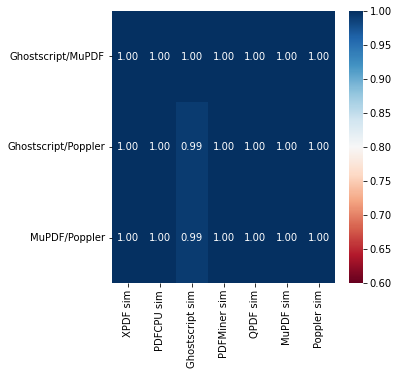

In [13]:
spotlight_result.sim_heatmap(report='sim', compare_orig=False, height=5, width=5)